# 6.1 Likelihood with independent observations

Suppose that the observed data consiste of a sample of $n$ observations. If these observations are independent, then the joint likelihood function from these $n$ observations has a very convenient form; it is the product of the likelihood from each observation. 

Suppose that the random variables $X_1,..., X_n$ are i.i.d., and that our observed data are $\mathbf{x} = \left\{ x_1, x_2, ..., x_n \right\}$. Then the likelihood function is given by:

$$
\begin{align*}
L \left( \theta \mid \mathbf{x} \right) &=  L\left( \theta \mid x_1 \right) L\left( \theta \mid x_2 \right) ...  L \left( \theta \mid x_n \right) \\
 &= \prod_{i=1}^n  L\left( \theta \mid x_i \right).
\end{align*}
$$

Recall that we often prefer to work with the log-likelihood function, as it simplifies the algebra when it comes to finding the MLE. The log-likelihood function for $n$ independent observations is given by:

$$
\begin{align*}
l \left( \theta \mid \mathbf{x} \right) 
 &= log \prod_{i=1}^n L\left( \theta \mid x_i \right) \\
  &= \sum_{i=1}^n log L\left( \theta \mid x_i \right) \\
   &= \sum_{i=1}^n l\left( \theta \mid x_i \right) 
\end{align*}
$$

Finding the MLE involves the same three steps as we saw in the previous session, but the log-likelihood function is now a joint function for the $n$ observations:

<div class="alert alert-success">
    
<b> Method for finding MLEs:</b>   
1.  Obtain the derivative of the log-likelihood: $\frac{d l(\theta \mid \mathbf{x})}{d \theta}$  
2.  Set $\frac{d l(\theta \mid \mathbf{x})}{d \theta}=0$ and solve for $\theta$   
3.  Verify that it is a maximum by showing that the second derivative $\frac{d ^2 l(\theta \mid  \mathbf{x})}{d \theta ^2 }$ is negative when the MLE is substituted for $\theta$.    
    
</div>



## 6.1.1 Example: Exponential distribution 

Recall the example from the previous session, investigating the time that patients wait until their GP appointment in a particular practice. The receptionist records the time that elapses between when a patient walks through the door, and when they are called through for their appointment for a random sample of 8 people. These times (in minutes) are: 8.75, 10.20, 15.29, 7.89, 7.04, 12.04, 19.04, 17.50.      

As a reminder, we can model the waiting time until a specific event using the exponential distribution with parameter $\lambda$, which has a probability density function given by:  

$$
\begin{equation}  
f _X\left(x \mid \lambda \right)=\lambda e^{-x\lambda} , x > 0, \lambda > 0  
\end{equation}
$$

> Recall that the mean of this distribution is equal to one over the rate parameter $\lambda$, i.e. $E(X) = \frac{1}{\lambda}$.

We have that the log-likelihood is: 

$$
\begin{align}
\log L\left( \lambda \mid \mathbf{x} \right) &= \sum_{i=1}^n \log  L(\lambda \mid x_i) \\ 
&= \sum_{i=1}^n \log \left( \lambda e^{-x_i \lambda } \right) \\
&= \sum_{i=1}^n \log \lambda -x_i\lambda \\  
&= n \log \lambda -\lambda \sum_{i=1}^n x_i 
\end{align}
$$

We can make a plot of this log-likelihood, using the data from our example with eight observations. 

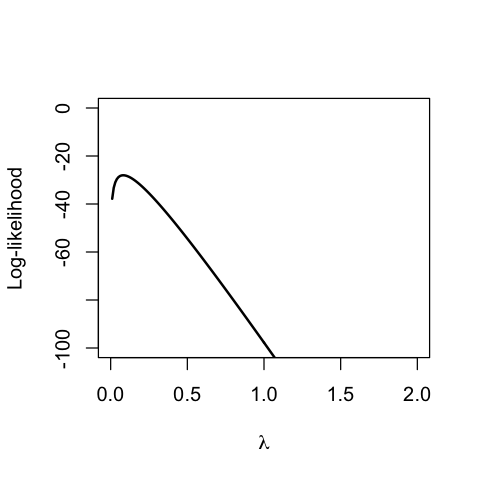

In [1]:
options(repr.plot.width=4, repr.plot.height=4)

#six independent observations for waiting times 
obs <- c(8.75, 10.20, 15.29, 7.89, 7.04, 12.04, 19.04, 17.50)
n <- length(obs)

#possible values for the parameter lambda
lambda <- seq(0, 2, 0.01)

#plot the log-likelihood
plot(lambda, n*log(lambda) - lambda*sum(obs), type="l",lwd=2, 
     xlab= expression(lambda), ylim=c(-100,0),
     ylab="Log-likelihood")

Graphically, we observe that the maximum is between 0 and 0.25. We will use the three steps, as before, to derive the MLE algebraically:

**Step1**: Taking the derivative of the log-likelihood with respect to $\lambda$:

$$
\begin{equation}
\frac{d log L\left( \lambda \mid x_1 ,..., x_n \right) }{d \lambda} = \frac{n}{\lambda}- \sum_{i=1}^n x_i 
\end{equation}
$$

**Step2:** Set the derivative equal to zero and solve for $\lambda$:

$$
\begin{align*}
0 &= \frac{n}{\lambda}- \sum_{i=1}^n x_i \\
\hat{\lambda} &= \frac{n }{\sum_{i=1}^n x_i} = \frac{1}{\bar{x}}
\end{align*}
$$

The MLE is $\hat{\lambda}= \frac{1}{\bar{x}}$. And to check that this provides a maximum, we go on to the next step:  

**Step3:** Find the second derivative: 


$$
\begin{equation}
\frac{d l^2 \left( \lambda \mid \boldsymbol{x} \right)}{d \lambda ^2} 
= - \frac{n}{\lambda^2}
\end{equation}
$$

When ${\lambda}=\frac{1}{\bar{x}}$, we have: 

$$
\begin{align}
 \frac{d l^2 \left( \lambda \mid \boldsymbol{x} \right)}{d \lambda ^2}  
 &=-n \bar{x}^2
 \end{align}
$$

which is negative. This verifies that we found the maximum likelihood estimate. 

Going back to our example of eight patients waiting for their GP appointment, the maximum likelihood estimate $\lambda$ is given by one over the average of the eight waiting times:

In [2]:
1/mean(obs)

[1] 0.08184143

We have that $\hat{\lambda}=0.0818$ minutes. 

## 6.1.2 Example: Normal distribution 

We will now consider the normal distribution. Remember that the normal distribution has two parameters, $\mu$ and $\sigma^2$. We will first obtain the MLE for $\mu$ (treating $\sigma^2$ as a constant), and in the practical, we will obtain the MLE for $\sigma^2$ (treating $\mu$ as a constant). 

Recall that normal distribution has probability density function given by*: 

$$
\begin{equation}  
f_X \left( x \mid \mu, \sigma^2 \right)= (2 \pi \sigma^2)^{-\frac{1}{2}} \exp \left\{-\frac{(x-\mu)^2}{2\sigma^2} \right\}
\end{equation}
$$

(* note that the notation here is slightly different to section 3. Here we are more prescriptive; on the left hand side the notation says that the random variable $X$ is sampled from parameters $\mu$ and $\sigma^2$, where the distribution is defined on the right hand side. Both versions of notation are acceptible. Another notation style is to use a semi-colon instead, ie. $f_X( x ; \mu, \sigma^2)$).

We have that the log-likelihood given an i.i.d. sample of size $n$ is: 

$$
\begin{align}
l \left(\mu, \sigma^2 \mid  \boldsymbol{x}  \right) &=  \sum_{i=1}^n \log \left\{ (2 \pi \sigma^2)^{-\frac{1}{2}} \exp \left\{-\frac{(x_i-\mu)^2}{2\sigma^2} \right\} \right\} \\
&= \sum_{i=1}^n \left\{ \log (2 \pi \sigma^2)^{-\frac{1}{2}}+ \log \exp  \left\{-\frac{(x_i-\mu)^2}{2\sigma^2} \right\}  \right\} \\
&= \sum_{i=1}^n \left\{ -\frac{1}{2} \log (2 \pi \sigma^2) - \frac{(x_i-\mu)^2}{2\sigma^2}  \right\} \\
&=  {-\frac{n}{2}}\log (2 \pi \sigma^2) -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\mu)^2 
\end{align}
$$

We will first find the MLE for the parameter $\mu$. 

**Step1**: Take the derivative of the log-likelihood with respect to  $\mu$. Note that this requires use of the chain rule:

$$
\begin{align}  
\frac{d l \left(\mu, \sigma^2 \mid  \mathbf{x}  \right) }{d \mu}
&=  -\frac{2}{2\sigma^2}(-1) \sum_{i=1}^n (x_i-\mu) \\
&=  \frac{ \sum_{i=1}^n (x_i-\mu)}{\sigma^2} \\
&=  \frac{ \sum_{i=1}^n x_i-n\mu}{\sigma^2}
\end{align}
$$

**Step2:** Setting the derivative equal to zero and solving for $\mu$:


$$
\begin{align}  
0 &=  \frac{ \sum_{i=1}^n x_i-n\mu}{\sigma^2} \\
\end{align}
$$

Since $\sigma^2 > 0$, we have that: 

$$
\begin{equation}  
0 = \sum_{i=1}^n x_i-n\mu 
\end{equation}
$$

$$
\begin{equation}  
\hat{\mu} =\frac{ \sum_{i=1}^n x_i}{n} = \bar{x}
\end{equation}
$$

We have that the MLE for $\mu$ is the sample mean, $\bar{x}$. 

**Step3:** Find the second derivative: 

$$
\begin{align}  
\frac{d^2 l \left(\mu, \sigma^2 \mid  \mathbf{x}  \right) }{d \mu^2 }
&=  -\frac{n}{\sigma^2},
\end{align}
$$

since both $n>0$ and $\sigma^2 >0$, we have that the second derivative is negative, verifying that we have found the maximum.    

In the practical, we will find the MLE for $\sigma^2$. 